In [47]:
import tensorflow as tf

In [48]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

In [49]:
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decodereview = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decodereview)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [50]:
import numpy as np

def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

In [51]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)) ,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [95]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 174us/sample - loss: 0.6662 - accuracy: 0.7339 - val_loss: 0.5069 - val_accuracy: 0.8379
Epoch 2/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.4557 - accuracy: 0.8668 - val_loss: 0.3910 - val_accuracy: 0.8846
Epoch 3/20
15000/15000 [==============================] - 1s 97us/sample - loss: 0.3695 - accuracy: 0.8976 - val_loss: 0.3745 - val_accuracy: 0.8873
Epoch 4/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.3291 - accuracy: 0.9147 - val_loss: 0.3849 - val_accuracy: 0.8830
Epoch 5/20
15000/15000 [==============================] - 1s 98us/sample - loss: 0.2929 - accuracy: 0.9279 - val_loss: 0.3688 - val_accuracy: 0.8848
Epoch 6/20
15000/15000 [==============================] - 1s 96us/sample - loss: 0.2745 - accuracy: 0.9345 - val_loss: 0.3861 - val_accuracy: 0.8794
Epoch 7/20
15000/15000 [=============================

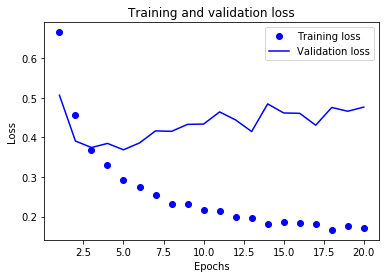

In [96]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

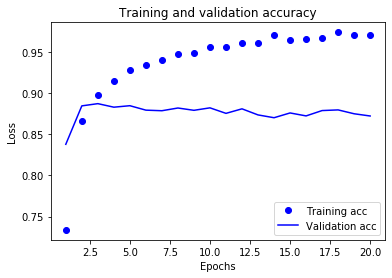

In [97]:

plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [69]:
model.predict(x_test)

array([[0.04618555],
       [0.9999887 ],
       [0.90939534],
       ...,
       [0.01468493],
       [0.08317546],
       [0.7960748 ]], dtype=float32)

In [70]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 64us/sample - loss: 0.5551 - accuracy: 0.8556


[0.5551309407997131, 0.85564]